In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from util import *
import numpy as np
import plotly.express as px
import torch
import torch.nn as nn

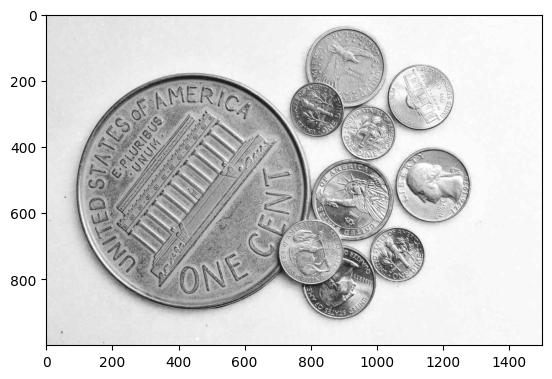

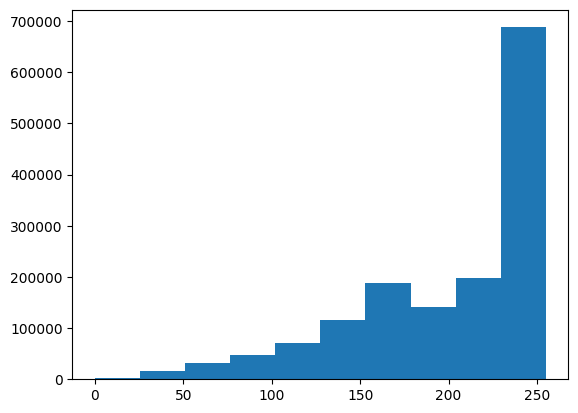

In [18]:
img = read_gray_img('./coins.jpg')
plt.imshow(img, cmap='gray')
plt.show()
plt.hist(img.reshape(-1))
plt.show()

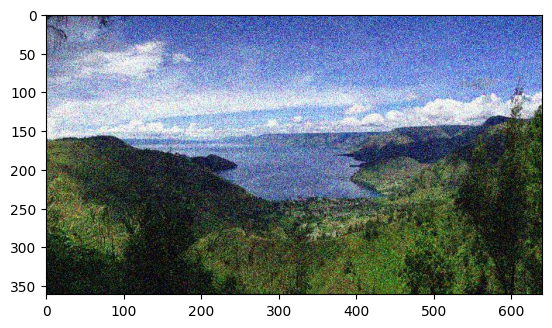

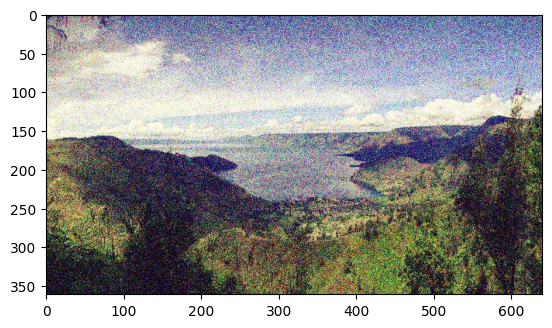

In [64]:
img = read_image_rbg('./nature2.jpg')
plt.imshow(img)
plt.show()
plt.imshow(my_equalization_rgb(img))

In [57]:
channels = []
for i in range(3):
    channels.append(my_equalization(img[:,:,i]).reshape(361, 640,1))
channels = np.concatenate(channels,axis=2)


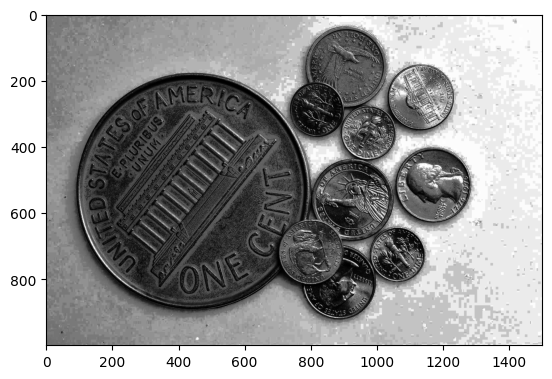

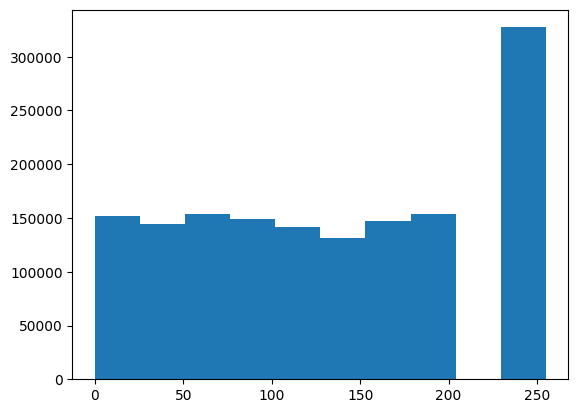

In [29]:

m,n = img.shape
cumulative = np.cumsum(np.histogram(img.reshape(-1),bins=256)[0])/(m*n)
img_ret = np.zeros_like(img)
for i in range(m):
    for j in range(n):
        img_ret[i,j] = np.floor(cumulative[img[i,j]]*(255))
plt.imshow(img_ret,cmap='gray')
plt.show()
plt.hist(img_ret.reshape(-1))
plt.show()

In [26]:
img_ret

array([[226, 226, 226, ..., 229, 229, 229],
       [226, 226, 226, ..., 229, 229, 229],
       [203, 203, 203, ..., 229, 229, 229],
       ...,
       [168, 168,  54, ..., 116, 116, 116],
       [ 54,  54,  40, ..., 229, 229, 229],
       [ 54,  40,  40, ..., 229, 229, 229]], dtype=uint8)

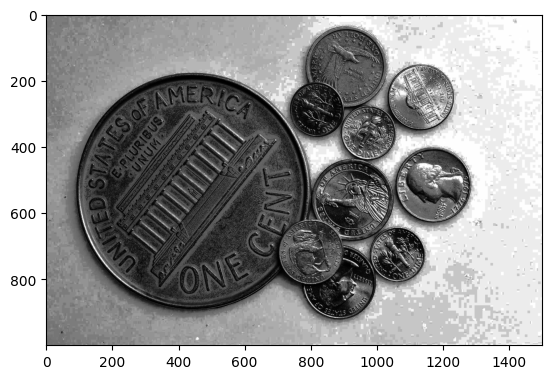

(array([145729., 149958., 146125., 152250., 137689., 131486., 149676.,
        152890.,      0., 334197.]),
 array([6.000000e-06, 1.000054e-01, 2.000048e-01, 3.000042e-01,
        4.000036e-01, 5.000030e-01, 6.000024e-01, 7.000018e-01,
        8.000012e-01, 9.000006e-01, 1.000000e+00]),
 <BarContainer object of 10 artists>)

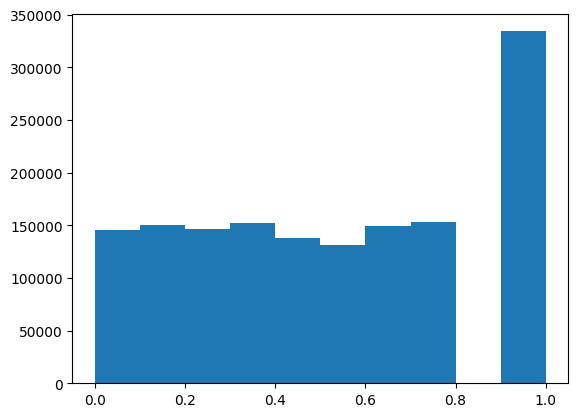

In [14]:
img_equalized = image_histogram_equalization(img.reshape(m,n,1))
plt.imshow(img_equalized,cmap='gray')
plt.show()
plt.hist(img_equalized.reshape(-1))

In [ ]:
fig = plt.figure(figsize=(30,10))
sigmas = [0.3,0.6,1,2,5]
ks = [2,3,4,7,10]
for i,sigma in enumerate(sigmas):
    img_t = ndimage.gaussian_filter(img, sigma=sigma)
    plt.subplot(2,len(sigmas),i+1)
    plt.imshow(img_t, cmap='gray')
    plt.title('sigma = {}'.format(sigma))

for i,k in enumerate(ks):
    img_t = convolution(img,get_mean_filter(k))
    plt.subplot(2,len(ks),len(sigmas)+i+1)
    plt.imshow(img_t, cmap='gray')
    plt.title('k = {}'.format(k))
plt.show()

In [ ]:
def get_sparse_kernel_matrix(K, h_X, w_X):
    h_K, w_K = K.shape

    h_Y, w_Y = h_X - h_K + 1, w_X - w_K + 1

    W = np.zeros((h_Y * w_Y, h_X * w_X))
    for i in range(h_Y):
        for j in range(w_Y):
            for ii in range(h_K):
                for jj in range(w_K):
                    W[i * w_Y + j, i * w_X + j + ii * w_X + jj] = K[ii, jj]

    return W

In [ ]:
def generate_convolution_matrix(filter,img_size):
    m,n = img_size
    k,l = filter.shape
    assert k==l
    assert m==n
    
    
    ret = np.zeros(((n-m+1)**2,n**2))
    line = np.zeros(m*n)
    for i in range(k):
        line[i*m:i*m+k] = filter[i,:]
    for i in range(k**2):
        if i==0:
            ret[i,i:] = line[:]
        else:
            ret[i,i:] = line[:-i]

    return ret



In [ ]:
filter = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
img = np.random.rand(1000,1000)


In [ ]:
%%time 
out = convolution(img,filter,p=0)

In [ ]:
filter_matr = get_sparse_kernel_matrix(filter,*img.shape)

In [ ]:
# define a tensor that requires grad


In [20]:
a = torch.tensor([1,2,3],dtype=float,requires_grad=True)
b = torch.tensor([4,5,6],dtype=float,requires_grad=True)
c = torch.tensor([7,8,9],dtype=float,requires_grad=True)

d = a+b*3
e = b*c

f = d*e
g = f.sum()
g.backward()

In [21]:
print(a.grad)
print(b.grad)
print(c.grad)


tensor([28., 40., 54.], dtype=torch.float64)
tensor([175., 256., 351.], dtype=torch.float64)
tensor([ 52.,  85., 126.], dtype=torch.float64)


In [24]:
# crate torch.no_grad() context
with torch.no_grad():
    print(e)
    print(e*3+d*c)
    print(b*d)

tensor([28., 40., 54.], dtype=torch.float64, grad_fn=<MulBackward0>)
tensor([175., 256., 351.], dtype=torch.float64)
tensor([ 52.,  85., 126.], dtype=torch.float64)
